# Applied Data Science Capstone Project
Using historical data to analyse and estimate road accident severity.

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
filename = 'Data-Collisions.csv'
collisions_loaded = pd.read_csv(filename)
collisions_loaded.head()

C:\Anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
collisions_loaded.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### Copy loaded data for convenience

In [160]:
collisions_df = collisions_loaded.copy()
collisions_df.shape

(194673, 38)

## Clean Data

In [161]:
print('Loaded data dimensions (shape)', collisions_df.shape)
collisions_df.dtypes

Loaded data dimensions (shape) (194673, 38)


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Item: SEVERITYCODE
This code corresponds to the severity of the collision. Only two codes are represented in the data ***(1=property damage and 2=injury)***. This code can be used as the target labels for the purpose of machine learning (ML). The redundundant SEVERITYCODE.1 should be dropped.
<p/>

### Item: X, Y
These are coordinates, ***where X=longitude (magnitudes<180) and Y=latitude (magnitudes<90)*** - these can be renamed used instead of the **LOCATION**, which is a description of the general location of the collision. So LOCATION should be dropped.
<p/>

### Initial List of Reduncant Items: (***based on insights drawn from the metadata document***)
OBJECTID, INCKEY, COLDETKEY, REPORTNO, INTKEY, EXCEPTRSNCODE, EXCEPTRSNDESC, SEVERITYDESC (***deferred***), INCDATE (***prefer INCDTTM***), SDOT_COLDESC, ST_COLDESC

In [162]:
colns_to_drop = ['SEVERITYCODE.1', 'LOCATION', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'INTKEY', 'EXCEPTRSNCODE',\
                 'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE', 'SDOT_COLDESC', 'ST_COLDESC']
collisions_df.drop(columns=colns_to_drop, inplace=True)

In [163]:
collisions_df.rename(columns={'X': 'longitude', 'Y': 'latitude'}, inplace=True)
collisions_df

,SEVERITYCODE,longitude,latitude,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,Angles,2,0,0,2,...,Overcast,Wet,Daylight,NaN,NaN,NaN,10,0,0,N
1,1,-122.347294,47.647172,Matched,Block,Sideswipe,2,0,0,2,...,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,0,0,N
2,1,-122.334540,47.607871,Matched,Block,Parked Car,4,0,0,3,...,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,0,0,N
3,1,-122.334803,47.604803,Matched,Block,Other,3,0,0,3,...,Clear,Dry,Daylight,NaN,NaN,NaN,23,0,0,N
4,2,-122.306426,47.545739,Matched,Intersection,Angles,2,0,0,2,...,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,Matched,Block,Head On,3,0,0,2,...,Clear,Dry,Daylight,NaN,NaN,NaN,24,0,0,N
194669,1,-122.344526,47.690924,Matched,Block,Rear Ended,2,0,0,2,...,Raining,Wet,Daylight,NaN,NaN,NaN,13,0,0,N
194670,2,-122.306689,47.683047,Matched,Intersection,Left Turn,3,0,0,2,...,Clear,Dry,Daylight,NaN,NaN,NaN,28,0,0,N
194671,2,-122.355317,47.678734,Matched,Intersection,Cycles,2,0,1,1,...,Clear,Dry,Dusk,NaN,NaN,NaN,5,4308,0,N


# Business Understanding
The objective is to leverage the accident data set provided to predict the different accidents' severity (the target label). The data set provides only two classes of severity (property damage=1, injury=2) as indicated by the SEVERITYCODE column. This is therefore, a binary classification problem.<p/>
Clearly, there are implications for predicting the severity class of each collision (either injury or property damage). The assumption is that an injury from a collision will indicate that the any medical assistance team will need to come prepared to possibly safe lifes or at least improve the chances of survival. The emergency team must come prepared to improve survival rates - and they may need to ask preparatory questions in preparation as they approach the collision location, etc. Therefore, false negatives (for the injury class) could have major implications. A false positive simply means that the emergency team would come prepared for injury that in all likelihood does did not actually occur - the cost implications for this scenary presumably are much lower and can be considered manageable.<p/>
On the other hand, the issue of property damage may not have such life-threatening implications compared to collision injury.

### Revisit the column data types

In [164]:
collisions_df.dtypes

SEVERITYCODE        int64
longitude         float64
latitude          float64
STATUS             object
ADDRTYPE           object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

<hr color= "red"/> 

### Data Visualization and Pre-processing
Based on the target labels, let’s see how many of each class are in the data set (is it balanced or unbalanced)

In [165]:
collisions_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

**Summary:**<br/>
    136485 collisions are property damage (1) and 58188 (injury) ==> the class distribution is unbalanced. ***The classifier performance will be better evaluated with the F1-Score metric instead of accuracy, as it is the harmonic mean of the recall and precision***.<p/>
    According to the following article, <a href="https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2">Accuracy vs. F1-Score</a> by Purva Huilgol, there are critical differences between accuracy and F1-Score:<br/>
    -- Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial<br/>
    -- Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case<br/>
    -- In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on<br/>

Plot some columns to get a better understanding of the data set:

### Convert to date time object 

In [166]:
collisions_df['INCDTTM'] = pd.to_datetime(collisions_df['INCDTTM'])
collisions_df['INCDTTM'].head()

0   2013-03-27 14:54:00
1   2006-12-20 18:55:00
2   2004-11-18 10:20:00
3   2013-03-29 09:26:00
4   2004-01-28 08:04:00
Name: INCDTTM, dtype: datetime64[ns]

### Lets look at the hour of the day that collisions occur

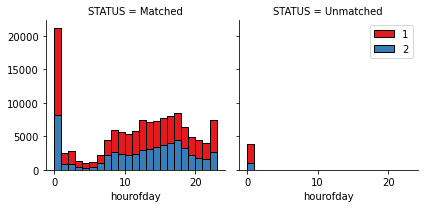

In [167]:
collisions_df['hourofday'] = collisions_df['INCDTTM'].dt.hour
bins = np.linspace(collisions_df.hourofday.min(), collisions_df.hourofday.max(), 24)
g = sns.FacetGrid(collisions_df, col="STATUS", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'hourofday', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

It appears that there is an unusual volume of collisions in the first hour of the day. So we can use feature binarization to set a threshold value less than hour 12 or morning hours.

In [169]:
morning_threshold = 12
collisions_df['morning'] = collisions_df['hourofday'].apply(lambda x: 1 if (x>morning_threshold)  else 0)
collisions_df[['INCDTTM', 'hourofday', 'morning']].head()

,INCDTTM,hourofday,morning
0,2013-03-27 14:54:00,14,1
1,2006-12-20 18:55:00,18,1
2,2004-11-18 10:20:00,10,0
3,2013-03-29 09:26:00,9,0
4,2004-01-28 08:04:00,8,0


<hr color= "red"/> 

## Convert Categorical features to numerical values

Lets look at collision status:
*Matched possibly refers to matched pairs or collisions involving two vehicles, see this study in the <a href="https://academic.oup.com/aje/article/167/5/546/211795">American Journal of Epidemiology</a>.*

In [171]:
collisions_df.groupby(['STATUS'])['SEVERITYCODE'].value_counts(normalize=True)

STATUS     SEVERITYCODE
Matched    1               0.698824
           2               0.301176
Unmatched  1               0.789441
           2               0.210559
Name: SEVERITYCODE, dtype: float64

30% of matched collisions result in injury compared to 21% of unmatched collisions - not a huge difference but significant

Lets convert matched to 0 and unmatched to 1:

In [172]:
collisions_df['STATUS'].replace(to_replace=['Matched','Unmatched'], value=[0, 1],inplace=True)

Lets look at inattention: *(reasonable default seems to be 'N')*

In [173]:
# first replace all missing data with 'N' - seems a reasonable default
collisions_df['INATTENTIONIND'].fillna('N', inplace=True)
collisions_df['INATTENTIONIND'].replace(to_replace=['N','Y'], value=[0, 1],inplace=True)

In [174]:
collisions_df.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts(normalize=True)

INATTENTIONIND  SEVERITYCODE
0               1               0.710126
                2               0.289874
1               1               0.651166
                2               0.348834
Name: SEVERITYCODE, dtype: float64

In 35% of collisions inattention = Y result in injury, compared to 29% where inattention = N.<br/>

Lets look at under the influence: *(0=N, 1=Y)*

In [175]:
# first replace all missing data with 'N' or 0 - seems a reasonable default
collisions_df['UNDERINFL'].fillna('N', inplace=True)
collisions_df['UNDERINFL'].replace(to_replace=['0', '1','N','Y'], value=[0, 1, 0, 1],inplace=True)
collisions_df['UNDERINFL'] = collisions_df['UNDERINFL'].astype(int)

In [176]:
collisions_df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL  SEVERITYCODE
0          1               0.705603
           2               0.294397
1          1               0.609473
           2               0.390527
Name: SEVERITYCODE, dtype: float64

In 39% of collisions with driver under the influence resulted in injury, compared to 29% with driver not under the influence.<br/>

Lets look at speeding: *(0=N, 1=Y)*

In [177]:
# first replace all missing data with 'N' or 0 - seems a reasonable default
collisions_df['SPEEDING'].fillna('N', inplace=True)
collisions_df['SPEEDING'].replace(to_replace=['N','Y'], value=[0, 1],inplace=True)
collisions_df['SPEEDING'] = collisions_df['SPEEDING'].astype(int)

In [178]:
collisions_df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)

SPEEDING  SEVERITYCODE
0         1               0.705099
          2               0.294901
1         1               0.621665
          2               0.378335
Name: SEVERITYCODE, dtype: float64

In 38% of collisions with driver speeding resulted in injury, compared to 29% with driver not speeding.<br/>

<hr color= "red"/> 

At this point, check the status of the dataframe:

In [179]:
collisions_df.head()

,SEVERITYCODE,longitude,latitude,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,hourofday,morning
0,2,-122.323148,47.703140,0,Intersection,Angles,2,0,0,2,...,Daylight,NaN,NaN,0,10,0,0,N,14,1
1,1,-122.347294,47.647172,0,Block,Sideswipe,2,0,0,2,...,Dark - Street Lights On,NaN,6354039.0,0,11,0,0,N,18,1
2,1,-122.334540,47.607871,0,Block,Parked Car,4,0,0,3,...,Daylight,NaN,4323031.0,0,32,0,0,N,10,0
3,1,-122.334803,47.604803,0,Block,Other,3,0,0,3,...,Daylight,NaN,NaN,0,23,0,0,N,9,0
4,2,-122.306426,47.545739,0,Intersection,Angles,2,0,0,2,...,Daylight,NaN,4028032.0,0,10,0,0,N,8,0


<hr color= "red"/> 

## One Hot Encoding  
#### Lets start with collision type

In [180]:
# make sure all NaN are converted to 'Other'
collisions_df['COLLISIONTYPE'].fillna('Other', inplace=True)
np.array(set(collisions_df['COLLISIONTYPE'].values))

array({'Other', 'Head On', 'Right Turn', 'Left Turn', 'Angles', 'Sideswipe', 'Pedestrian', 'Parked Car', 'Cycles', 'Rear Ended'},
      dtype=object)

In [181]:
collisions_df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=False)
#collisions_df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         1               21050
               2               13624
Cycles         2                4744
               1                 671
Head On        1                1152
               2                 872
Left Turn      1                8292
               2                5411
Other          1               21454
               2                7153
Parked Car     1               45325
               2                2662
Pedestrian     2                5936
               1                 672
Rear Ended     1               19419
               2               14671
Right Turn     1                2347
               2                 609
Sideswipe      1               16103
               2                2506
Name: SEVERITYCODE, dtype: int64

Lets look at the weather:

In [182]:
# make sure all NaN are converted to 'Other'
collisions_df['WEATHER'].fillna('Other', inplace=True)
np.array(set(collisions_df['WEATHER'].values))

array({'Other', 'Fog/Smog/Smoke', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy', 'Sleet/Hail/Freezing Rain', 'Clear', 'Raining', 'Overcast', 'Snowing', 'Unknown'},
      dtype=object)

In [183]:
collisions_df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=False)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1                  41
                          2                  15
Clear                     1               75295
                          2               35840
Fog/Smog/Smoke            1                 382
                          2                 187
Other                     1                4713
                          2                1200
Overcast                  1               18969
                          2                8745
Partly Cloudy             2                   3
                          1                   2
Raining                   1               21969
                          2               11176
Severe Crosswind          1                  18
                          2                   7
Sleet/Hail/Freezing Rain  1                  85
                          2                  28
Snowing                   1                 736
                          2                 171
U

Lets look at road conditions:

In [184]:
# make sure all NaN are converted to 'Other'
collisions_df['ROADCOND'].fillna('Other', inplace=True)
np.array(set(collisions_df['ROADCOND'].values))

array({'Other', 'Dry', 'Snow/Slush', 'Oil', 'Ice', 'Wet', 'Standing Water', 'Unknown', 'Sand/Mud/Dirt'},
      dtype=object)

In [185]:
collisions_df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=False)

ROADCOND        SEVERITYCODE
Dry             1               84446
                2               40064
Ice             1                 936
                2                 273
Oil             1                  40
                2                  24
Other           1                4041
                2                1103
Sand/Mud/Dirt   1                  52
                2                  23
Snow/Slush      1                 837
                2                 167
Standing Water  1                  85
                2                  30
Unknown         1               14329
                2                 749
Wet             1               31719
                2               15755
Name: SEVERITYCODE, dtype: int64

Lets look at light conditions:

In [186]:
# make sure all NaN are converted to 'Other'
collisions_df['LIGHTCOND'].fillna('Other', inplace=True)
np.array(set(collisions_df['LIGHTCOND'].values))

array({'Other', 'Dawn', 'Dark - Street Lights Off', 'Daylight', 'Dusk', 'Unknown', 'Dark - Unknown Lighting', 'Dark - No Street Lights', 'Dark - Street Lights On'},
      dtype=object)

In [187]:
collisions_df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=False)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1                1203
                          2                 334
Dark - Street Lights Off  1                 883
                          2                 316
Dark - Street Lights On   1               34032
                          2               14475
Dark - Unknown Lighting   1                   7
                          2                   4
Dawn                      1                1678
                          2                 824
Daylight                  1               77593
                          2               38544
Dusk                      1                3958
                          2                1944
Other                     1                4263
                          2                1142
Unknown                   1               12868
                          2                 605
Name: SEVERITYCODE, dtype: int64

<hr color= "red"/> 

# Combining Latitude/Longitude
Combining latitude/longitude position into single feature using the <a href="https://datascience.stackexchange.com/questions/49553/combining-latitude-longitude-position-into-single-feature">Haversine formula</a>

In [188]:
from math import radians, cos, sin, asin, sqrt

def location(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

Use the location function defined to calculate a single location for each pair of latitude/longitude:

In [189]:
collisions_df['location'] = [location(x, y) for x, y in zip(collisions_df.latitude, collisions_df.longitude)]
collisions_df['location'].head()

0    12352.644223
1    12356.919651
2    12357.905534
3    12358.067920
4    12358.918252
Name: location, dtype: float64

Lets look at the locations that collisions occur:

Bins:  [12348.67136849 12350.64503458 12352.61870067 12354.59236676
 12356.56603286 12358.53969895 12360.51336504 12362.48703113
 12364.46069722 12366.43436331]


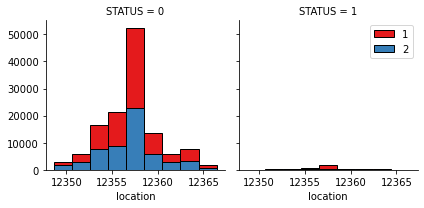

In [190]:
bins = np.linspace(collisions_df.location.min(), collisions_df.location.max(), 10)
print('Bins: ', bins)
g = sns.FacetGrid(collisions_df, col="STATUS", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'location', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

**Summary:** It seems that most of the collisions occure within approximately one standard deviation from a mean point (hot spot).<br/>
We can use feature binarization to set a threshold value about one standard deviation from the hot spot (mean).

#### First, explore the location partitions or bins or brackets:

In [193]:
collisions_df['loc_bracket'] = collisions_df['location'].apply(lambda x: np.digitize(x, bins))
collisions_df['loc_bracket'].head()

0    3
1    5
2    5
3    5
4    6
Name: loc_bracket, dtype: int64

#### Then explore idea of the hot spot as well:

In [194]:
hot_spot = collisions_df.location.mean()
loc_std = collisions_df.location.std()
print('The hot spot is estimated at location [mean =', hot_spot, ',std =', loc_std,']')

The hot spot is estimated at location [mean = 12357.08123630904 ,std = 3.0681291833829416 ]


In [196]:
# binarize location --> point is either within the standard deviation window or not
thres_mult = 1 # i.e. thres_mult * standard deviations from the hot spot
lower_bound = hot_spot - thres_mult*loc_std
upper_bound = hot_spot + thres_mult*loc_std
collisions_df['location'] = collisions_df['location'].apply(lambda x: 1 if (x>lower_bound and x<upper_bound) else 0)
#collisions_df['location'].head()

<hr color= "red"/> 

Lets look at the total number of people involved in collision (PERSONCOUNT):

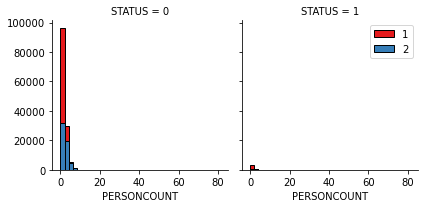

In [198]:
bins = np.linspace(collisions_df.PERSONCOUNT.min(), collisions_df.PERSONCOUNT.max(), 40)
#print('Bins: ', bins)
g = sns.FacetGrid(collisions_df, col="STATUS", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

**Summary:** It seems that most of the collisions involving <10 people are associated with most injuries occur.<br/>
We can use feature binarization to set a threshold value of 10.

In [199]:
count_threshold = 10
collisions_df['PERSONCOUNT'] = collisions_df['PERSONCOUNT'].apply(lambda x: x if (x<count_threshold)  else 0)
#collisions_df[['PERSONCOUNT']].head()

In [201]:
collisions_df.groupby(['PERSONCOUNT'])['SEVERITYCODE'].value_counts(normalize=False)

PERSONCOUNT  SEVERITYCODE
0            1                3960
             2                1949
1            1                9858
             2                3296
2            1               86420
             2               27811
3            1               22092
             2               13461
4            1                8365
             2                6295
5            1                3615
             2                2969
6            2                1357
             1                1345
7            2                 637
             1                 494
8            2                 284
             1                 249
9            2                 129
             1                  87
Name: SEVERITYCODE, dtype: int64

In 27% of collisions with <4 people resulted in injury, compared to 45% with 4 or more people.<br/>

Lets look at the total number of pedestrians involved in collision (PEDCOUNT):

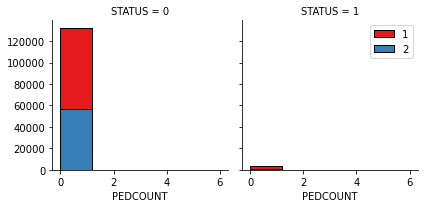

In [202]:
bins = np.linspace(collisions_df.PEDCOUNT.min(), collisions_df.PEDCOUNT.max(), 6)
#print('Bins: ', bins)
g = sns.FacetGrid(collisions_df, col="STATUS", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PEDCOUNT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

**Summary:** It seems that most of the collisions with <2 pedestrians is where most injuries occur.<br/>
We can use feature binarization to set a threshold value of 2. We must ignore all those with zero pedestrians.

In [203]:
count_threshold = 2
# ignore all with zero pedestrians
collisions_df['PEDCOUNT'] = collisions_df['PEDCOUNT'].apply(lambda x: 1 if (x<count_threshold and x>0)  else 0)
#collisions_df[['PEDCOUNT']].tail(20)

In [204]:
collisions_df.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts(normalize=False)

PEDCOUNT  SEVERITYCODE
0         1               135807
          2                52181
1         2                 6007
          1                  678
Name: SEVERITYCODE, dtype: int64

In 10% of collisions involving pedestrians resulted in injury, compared to 27% without.<br/>

Lets look at the total number of bicycles involved in collision (PEDCYLCOUNT):

In [205]:
# either a bicycle was involved or not
collisions_df['PEDCYLCOUNT'] = collisions_df['PEDCYLCOUNT'].apply(lambda x: 1 if (x>0)  else 0)

Lets look at the total number of vehicles involved in collision (VEHCOUNT):

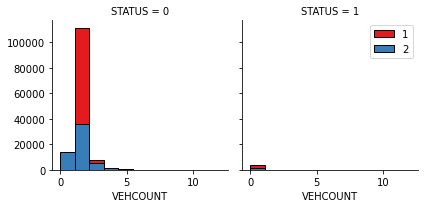

In [206]:
bins = np.linspace(collisions_df.VEHCOUNT.min(), collisions_df.VEHCOUNT.max(), 12)
#print('Bins: ', bins)
g = sns.FacetGrid(collisions_df, col="STATUS", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [207]:
# either two vehicles were involved or not
collisions_df['VEHCOUNT'] = collisions_df['VEHCOUNT'].apply(lambda x: x if (x < 5)  else 0)

In [208]:
collisions_df.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=False)

VEHCOUNT  SEVERITYCODE
0         1                 4253
          2                 1586
1         2                14105
          1                11643
2         1               111701
          2                35949
3         1                 7540
          2                 5470
4         1                 1348
          2                 1078
Name: SEVERITYCODE, dtype: int64

The vast majority of collisions involved two vehicles, with 24% of collisions involving 2 vehicles resulting in injury, compared to 47% otherwise.<br/>

Lets look at the state collision code associated with the collision (SDOT_COLCODE):

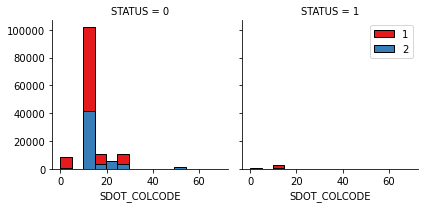

In [209]:
bins = np.linspace(collisions_df.SDOT_COLCODE.min(), collisions_df.SDOT_COLCODE.max(), 15)
#print('Bins: ', bins)
g = sns.FacetGrid(collisions_df, col="STATUS", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SDOT_COLCODE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

It appears that most collisions are associated with codes between 10 and 15 and most injuries match that range (entering at an angle etc.).

In [210]:
# either two vehicles were involved or not
collisions_df['SDOT_COLCODE'] = collisions_df['SDOT_COLCODE'].apply(lambda x: x if (x >= 10 and x<=30)  else 0)

In [211]:
collisions_df.groupby(['SDOT_COLCODE'])['SEVERITYCODE'].value_counts(normalize=False)

SDOT_COLCODE  SEVERITYCODE
0             1                9652
              2                2401
11            1               60871
              2               24338
12            1                1413
              2                  27
13            1                5653
              2                 199
14            1               36551
              2               17748
15            1                1529
              2                  75
16            1                9236
              2                 692
18            2                2734
              1                 370
21            2                 140
              1                  41
22            2                  16
              1                   1
23            2                  93
              1                  31
24            2                5853
              1                 665
25            1                  82
              2                  20
26            1                3568
 

*The other related code, SDOTCOLNUM, a number given to the collision by SDOT, appears to provide a reduncdant code and appears to be an over-specification of the same factors address by a variety of other factors already included. This code can reasonably be ignored.*

<hr color= "red"/> 

### Summarize Collisions Data Set Columns

In [212]:
collisions_df.columns

Index(['SEVERITYCODE', 'longitude', 'latitude', 'STATUS', 'ADDRTYPE',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR', 'hourofday', 'morning', 'location', 'loc_bracket'],
      dtype='object')

## Create features set from the prepared data set

In [213]:
Features = collisions_df[['location','loc_bracket', 'STATUS','COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', \
                          'hourofday', 'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', \
                          'SPEEDING', 'morning']]
Features.head()

,location,loc_bracket,STATUS,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,hourofday,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,morning
0,0,3,0,Angles,2,0,0,2,14,11,0,0,Overcast,Wet,Daylight,0,1
1,0,5,0,Sideswipe,2,0,0,2,18,16,0,0,Raining,Wet,Dark - Street Lights On,0,1
2,0,5,0,Parked Car,4,0,0,3,10,14,0,0,Overcast,Dry,Daylight,0,0
3,0,5,0,Other,3,0,0,3,9,11,0,0,Clear,Dry,Daylight,0,0
4,0,6,0,Angles,2,0,0,2,8,11,0,0,Raining,Wet,Daylight,0,0


#### We use the one hot encoding technique to conver categorical varables, such as collision type, to binary variables and append them to the features Data Frame 

In [214]:
Features = pd.concat([Features, pd.get_dummies(collisions_df[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']])], axis=1)
Features.drop(['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], axis = 1, inplace=True)
Features.head()

,location,loc_bracket,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,hourofday,SDOT_COLCODE,INATTENTIONIND,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,3,0,2,0,0,2,14,11,0,...,1,0,0,0,0,0,1,0,0,0
1,0,5,0,2,0,0,2,18,16,0,...,1,0,0,1,0,0,0,0,0,0
2,0,5,0,4,0,0,3,10,14,0,...,0,0,0,0,0,0,1,0,0,0
3,0,5,0,3,0,0,3,9,11,0,...,0,0,0,0,0,0,1,0,0,0
4,0,6,0,2,0,0,2,8,11,0,...,1,0,0,0,0,0,1,0,0,0


In [215]:
Features.columns

Index(['location', 'loc_bracket', 'STATUS', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'hourofday', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'morning',
       'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe', 'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear',
       'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast',
       'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'LIGHTCOND_Dark - No Stree

In [50]:
Features.shape

(194673, 49)

<hr color= "red"/> 

### Classification Features selection

Now, we define the classification feature sets, X:

In [216]:
# remove all the unknown or other conditions as they add very little interpretational or meaningful value
# further refinement based on the earlier analysis done above
full_short_listed = ['location', 'loc_bracket', 'STATUS', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', \
                     'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'morning', 'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', \
                     'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian', \
                     'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe', 'WEATHER_Blowing Sand/Dirt', \
                     'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining', \
                     'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing', 'ROADCOND_Dry', 'ROADCOND_Ice', \
                     'ROADCOND_Oil', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush', 'ROADCOND_Standing Water', 'ROADCOND_Wet', \
                     'LIGHTCOND_Dark - No Street Lights', 'LIGHTCOND_Dark - Street Lights Off', 'LIGHTCOND_Dark - Street Lights On', \
                     'LIGHTCOND_Dawn', 'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk']
short_listed1 = ['location', 'loc_bracket', 'STATUS', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'INATTENTIONIND', \
                'UNDERINFL', 'SPEEDING', 'morning', 'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On', \
                'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended', \
                'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe', 'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', \
                'WEATHER_Fog/Smog/Smoke', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining', \
                'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing', \
                'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush', \
                'ROADCOND_Standing Water', 'ROADCOND_Wet', 'LIGHTCOND_Dark - No Street Lights', \
                'LIGHTCOND_Dark - Street Lights Off', 'LIGHTCOND_Dark - Street Lights On', 'LIGHTCOND_Dawn', \
                'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk']
short_listed_opt = ['UNDERINFL', 'SPEEDING', 'morning', 'WEATHER_Snowing'] # KNN = 0.6959460847767572 accuracy
# make sure to update the following with the correct short_listed features
short_listed_opt = short_listed1 # stores the optimal short list of features (<=30)

In [217]:
X = Features[short_listed_opt]
X[0:5]

,location,loc_bracket,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,...,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
0,0,3,0,2,0,0,2,11,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,5,0,2,0,0,2,16,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,5,0,4,0,0,3,14,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,5,0,3,0,0,3,11,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,6,0,2,0,0,2,11,0,0,...,0,0,0,1,0,0,0,0,1,0


**Observation:** The initial subset has 41 features. This is a very high number of features and it is expected that further rationalization will have to be made after the first run to reduce the number of features.

Lets prepare the target labels:<br/>
*We are keen to correctly predict if a collision will result in injury (with greater implications) --> so, to simplify, we binarize the severity since the data set only contains data for 1=property damage or 2=injury*

In [218]:
# So, after this, 1=injury and 0=property damage
y = collisions_df['SEVERITYCODE'].apply(lambda x: 1 if (x==2) else 0).values
y[0:5]

array([1, 0, 0, 0, 1], dtype=int64)

## Data Normalization

In [219]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.        , -1.07451352, -0.16046824, -0.36068   , -0.18857566,
        -0.17025536,  0.16777055, -0.39858379, -0.42518348, -0.2217116 ,
        -0.22440165,  1.01068516,  2.14811072, -0.16915004, -0.10249953,
        -0.27517219, -0.57196238, -0.18744809, -0.46074827, -0.12417149,
        -0.32510694, -0.01696304, -1.15340914, -0.05414257,  2.45445634,
        -0.00506801, -0.45298634, -0.011333  , -0.02409974, -0.06841713,
        -1.33213439, -0.07905204, -0.01813462, -0.01963186, -0.07200071,
        -0.02431221,  1.76085874, -0.08920831, -0.07872239, -0.576075  ,
        -0.1141037 ,  0.82233559, -0.17682024],
       [ 0.        ,  0.05083863, -0.16046824, -0.36068   , -0.18857566,
        -0.17025536,  0.16777055,  0.47554373, -0.42518348, -0.2217116 ,
        -0.22440165,  1.01068516, -0.46552535, -0.16915004, -0.10249953,
        -0.27517219, -0.57196238, -0.18744809, -0.46074827, -0.12417149,
         3.07591099, -0.01696304, -1.15340914, -0.05414257, -0.4074222 ,
   

### Determine the most important or impactful features using Decision Tree Classifier:

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_val_score

### Prepare Training Set (*preliminary preparation*)
Use this for preliminary preparation - feature selection using a DecisionTree classifier.

In [221]:
from sklearn.model_selection import train_test_split
test_prop = 0.25 # the data set is relatively large, so a higher proportion can be reserved for testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_prop, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146004, 43) (146004,)
Test set: (48669, 43) (48669,)


In [222]:
tree_depths = 40 # relatively high to explore as many conttributing features in the decision as possible
#Train Model and Predict
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = tree_depths).fit(X_train,y_train)
tree_yhat = tree_model.predict(X_test)
tree_accuracy = f1_score(y_test, tree_yhat)
print('Decision Tree Test Set accuracy(f1): ', tree_accuracy)
print('Feature importances:', tree_model.feature_importances_)

Decision Tree Test Set accuracy(f1):  0.4552115539367244
Feature importances: [0.00000000e+00 1.23823055e-01 3.76058512e-04 9.09139889e-02
 7.94943395e-02 6.09961743e-02 2.41517245e-02 5.33586951e-02
 2.80474344e-02 1.78019617e-02 1.78158903e-02 4.58725096e-02
 5.26958283e-03 4.61021334e-04 3.59520086e-03 6.73593166e-03
 2.11186455e-01 2.52393431e-03 3.30767738e-03 4.42203789e-03
 4.10058564e-02 3.59722158e-04 2.12584989e-02 3.42076100e-03
 2.10989365e-02 9.06426247e-05 1.62841767e-02 3.03135851e-04
 7.17122061e-04 2.56213933e-03 1.74802462e-02 3.74384114e-03
 4.66196352e-04 2.57544439e-04 2.14145607e-03 7.67540331e-04
 1.56361649e-02 4.06159982e-03 4.06734034e-03 2.28456159e-02
 6.70370740e-03 2.33142226e-02 1.12598597e-02]


In [223]:
feature_importances = tree_model.feature_importances_
top_feature_index = np.argmax(feature_importances)
print('Top feature', short_listed_opt[top_feature_index], 'at', top_feature_index)
indices = np.argsort(feature_importances)[::-1] # in descending order
# prepare sorted features
sorted_features = np.array([short_listed_opt[feat] for feat in indices])
sorted_features

Top feature COLLISIONTYPE_Parked Car at 16


array(['COLLISIONTYPE_Parked Car', 'loc_bracket', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'SDOT_COLCODE', 'morning',
       'COLLISIONTYPE_Sideswipe', 'INATTENTIONIND', 'VEHCOUNT',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dark - Street Lights On',
       'WEATHER_Clear', 'WEATHER_Overcast', 'SPEEDING', 'UNDERINFL',
       'ROADCOND_Dry', 'WEATHER_Raining', 'ROADCOND_Wet',
       'LIGHTCOND_Dusk', 'COLLISIONTYPE_Left Turn', 'LIGHTCOND_Dawn',
       'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Right Turn',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - No Street Lights', 'ROADCOND_Ice',
       'COLLISIONTYPE_Head On', 'WEATHER_Fog/Smog/Smoke',
       'COLLISIONTYPE_Rear Ended', 'WEATHER_Snowing',
       'COLLISIONTYPE_Pedestrian', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'WEATHER_Sleet/Hail/Freezing Rain',
       'ROADCOND_Oil', 'COLLISIONTYPE_Cycles', 'STATUS',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Severe Crosswind',
       'ROADCOND_Sand/

#### Plot the feature importances:

In [224]:
def plot_feature_importances(sorted_importances, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), sorted_importances)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

Features.size 43


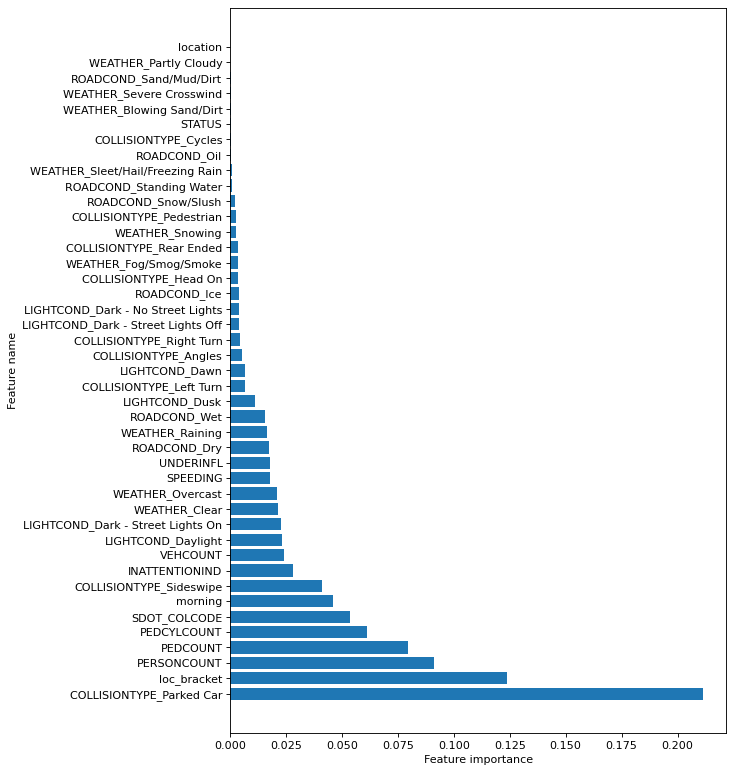

In [225]:
print('Features.size', len(short_listed_opt))
plt.figure(figsize=(8, 12), dpi=80)
plot_feature_importances(feature_importances[indices], sorted_features)
plt.show()

#### List the sorted features according to their importances:

In [226]:
importances_df = pd.DataFrame(data=feature_importances[indices], index=sorted_features, columns=['Importance'])
#print('Feature importances: {}'.format(feature_importances[indices]))

num_features_selected = 30 # based on the importances plotted
#importances_df.iloc[:num_features_selected]

#### Note the number of features selected:

In [227]:
selected_features = importances_df.iloc[:num_features_selected]
selected_features.index

Index(['COLLISIONTYPE_Parked Car', 'loc_bracket', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'SDOT_COLCODE', 'morning', 'COLLISIONTYPE_Sideswipe',
       'INATTENTIONIND', 'VEHCOUNT', 'LIGHTCOND_Daylight',
       'LIGHTCOND_Dark - Street Lights On', 'WEATHER_Clear',
       'WEATHER_Overcast', 'SPEEDING', 'UNDERINFL', 'ROADCOND_Dry',
       'WEATHER_Raining', 'ROADCOND_Wet', 'LIGHTCOND_Dusk',
       'COLLISIONTYPE_Left Turn', 'LIGHTCOND_Dawn', 'COLLISIONTYPE_Angles',
       'COLLISIONTYPE_Right Turn', 'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - No Street Lights', 'ROADCOND_Ice',
       'COLLISIONTYPE_Head On', 'WEATHER_Fog/Smog/Smoke',
       'COLLISIONTYPE_Rear Ended'],
      dtype='object')

### Attempt dimentionality reduction using PCA:

In [228]:
X_to_pca = Features[selected_features.index]
X_to_pca.head()

,COLLISIONTYPE_Parked Car,loc_bracket,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,morning,COLLISIONTYPE_Sideswipe,INATTENTIONIND,VEHCOUNT,...,COLLISIONTYPE_Left Turn,LIGHTCOND_Dawn,COLLISIONTYPE_Angles,COLLISIONTYPE_Right Turn,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - No Street Lights,ROADCOND_Ice,COLLISIONTYPE_Head On,WEATHER_Fog/Smog/Smoke,COLLISIONTYPE_Rear Ended
0,0,3,2,0,0,11,1,0,0,2,...,0,0,1,0,0,0,0,0,0,0
1,0,5,2,0,0,16,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,5,4,0,0,14,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,0,5,3,0,0,11,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4,0,6,2,0,0,11,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0


In [242]:
from sklearn.decomposition import PCA

n_components = 2 # keep numbers of features low or lower
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_to_pca)
X = X_pca # may comment this out if ...
X[0:5]

array([[-2.2543494 , -1.9340367 ],
       [ 2.73871743,  0.15342135],
       [ 0.61735606,  0.03668699],
       [-2.33000382,  0.02677333],
       [-2.28312618,  1.0811706 ]])

#### Plot the outcome of dimensionality reduction

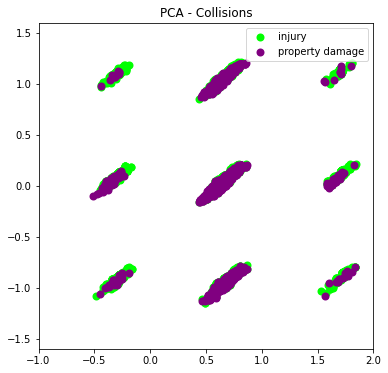

In [243]:
colors = ['lime', 'purple']
target_names = ['injury', 'property damage']
plt.figure(figsize=(6, 6))
#plot the top two latent features
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, lw=2, label=target_name)

plt.title('PCA - Collisions')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.axis([-1, 2, -1.6, 1.6])
plt.show()

# Classification

A training set is used to build a accurate model, based on a set of classifiers. A test set is used to evaluate the accuracy of classifiers. Thereafter, the best classifier model is selected.

The following candidate classifier algorithms are evaluated:
- K Nearest Neighbor(KNN) *(typically, simple and expected to do a good jobs)*
- Decision Tree
- Support Vector Machine
- Logistic Regression

### Prepare the Training and Test Sets

In [244]:
from sklearn.model_selection import train_test_split
test_prop = 0.25 # the data set is relatively large, so a higher proportion can be reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_prop, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146004, 2) (146004,)
Test set: (48669, 2) (48669,)


### Set up how the models will be evaluated (using cross-validation):

In [232]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_val_score

# K Nearest Neighbor (KNN)

The best accuracy was 0.736361955248721 with k= 4


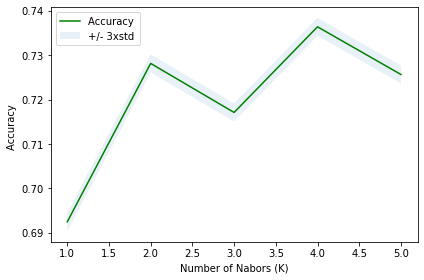

In [245]:
# Calculate the accuracy of KNN for different Ks
Ks = 6
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = np.mean(y_test == yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
# Plot model accuracy for different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [246]:
# Finally, train Model using the best k
k = 4 # optimal k from above
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

Evaluate the model:<br/>
*First, review the list of evaluation scorers*

In [247]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [248]:
# Evaluate model: accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(knn_model, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(knn_model, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(knn_model, X, y, cv=5, scoring = 'recall'))
# use precision as scoring metric
print('Cross-validation (precision)', cross_val_score(knn_model, X, y, cv=5, scoring = 'precision_macro'))
# use f1 as scoring metric
print('Cross-validation (f1)', cross_val_score(knn_model, X, y, cv=5, scoring = 'f1_weighted'))

Cross-validation (accuracy) [0.72615898 0.73604726 0.73432644 0.73085221 0.73282992]
Cross-validation (AUC) [0.7041575  0.72995872 0.71546634 0.71571075 0.69314286]
Cross-validation (recall) [0.27341468 0.2981612  0.31190926 0.34098135 0.35215262]
Cross-validation (precision) [0.66925369 0.68855089 0.68277652 0.67346492 0.67645791]
Cross-validation (f1) [0.68996214 0.70278611 0.70402858 0.70634192 0.70978227]


# Decision Tree (DT)

In [ ]:
# Calculate the accuracy of tree classifier for different depths
tree_depths = 30
mean_acc = np.zeros((tree_depths-1))
std_acc = np.zeros((tree_depths-1))
for n in range(1,tree_depths):
    #Train Model and Predict
    tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    tree_classifier.fit(X_train,y_train)
    yhat=tree_classifier.predict(X_test)
    mean_acc[n-1] = np.mean(y_test == yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print( "The best accuracy was", mean_acc.max(), "with max_depth=", mean_acc.argmax()+1) 
# Plot model accuracy for different tree depths
plt.plot(range(1,tree_depths),mean_acc,'g')
plt.fill_between(range(1,tree_depths),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Tree depth (max_depth)')
plt.tight_layout()
plt.show()

In [106]:
# Train Model and Predict
tree_depths = 27 # optimal depth from above
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = tree_depths).fit(X_train,y_train)
tree_model

DecisionTreeClassifier(criterion='entropy', max_depth=27)

In [107]:
# Evaluate model: accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(tree_model, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(tree_model, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(tree_model, X, y, cv=5, scoring = 'recall'))
# use precision as scoring metric
print('Cross-validation (precision)', cross_val_score(tree_model, X, y, cv=5, scoring = 'precision_macro'))
# use f1 as scoring metric
print('Cross-validation (f1)', cross_val_score(tree_model, X, y, cv=5, scoring = 'f1_weighted'))

Cross-validation (accuracy) [0.74097855 0.75174008 0.75212534 0.7486002  0.74893409]
Cross-validation (AUC) [0.75562851 0.76851683 0.76691042 0.76198269 0.73581396]
Cross-validation (recall) [0.24102079 0.2680873  0.30254339 0.28323451 0.29440577]
Cross-validation (precision) [0.71986492 0.74282564 0.72844743 0.72480274 0.72217983]
Cross-validation (f1) [0.69404385 0.70867063 0.71660699 0.70958831 0.71228881]


# Support Vector Machine (SVM)
Too computationally demanding (rbf kernel) --> prefer *'linear'* kernel. It should be noted that the dataset is parse, making SVM even more demanding. LinearSVM should be preferred.

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The best accuracy was 0.7002609463929812 with C = 0.01


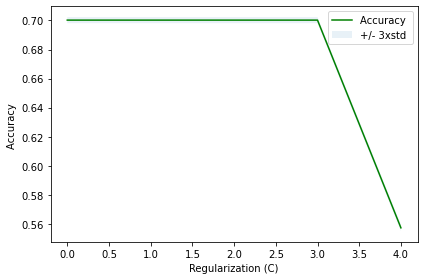

In [121]:
# Calculate the accuracy of SVM for different C, and degree, and gamma
Cs = [0.01, 0.1, 1, 15, 250] # regularization parameters
random_state = 0 # ensure repeatable
mean_acc = np.zeros(len(Cs))
std_acc = np.zeros(len(Cs))
for c, this_C in enumerate(Cs):
    svm_classifier = LinearSVC(C = this_C, max_iter=1500, random_state=random_state)
    svm_classifier.fit(X_train, y_train)
    yhat = svm_classifier.predict(X_test)
    mean_acc[c] = np.mean(y_test == yhat)
    std_acc[c] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was", mean_acc.max(), "with C =", Cs[mean_acc.argmax()]) 
# Plot model accuracy for different Cs
plt.plot(range(len(Cs)),mean_acc,'g')
plt.fill_between(range(len(Cs)),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Regularization (C)')
plt.tight_layout()
plt.show()

In [122]:
# Finally, train Model using the best parameters
C = 1 # optimal C from above
svm_model = LinearSVC(C = C, max_iter=1500, random_state=random_state).fit(X_train, y_train)
svm_model

LinearSVC(C=1, max_iter=1500, random_state=0)

In [117]:
# Evaluate model: accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(svm_model, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(svm_model, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(svm_model, X, y, cv=5, scoring = 'recall'))
# use precision as scoring metric
print('Cross-validation (precision)', cross_val_score(svm_model, X, y, cv=5, scoring = 'precision_macro'))
# use f1 as scoring metric
print('Cross-validation (f1)', cross_val_score(svm_model, X, y, cv=5, scoring = 'f1_weighted'))

Cross-validation (accuracy) [0.70109156 0.70109156 0.70109156 0.70110957 0.70110957]
Cross-validation (AUC) [0.58629994 0.57812516 0.57437823 0.57467703 0.53760584]
Cross-validation (recall) [0. 0. 0. 0. 0.]


C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning

Cross-validation (precision) [0.35054578 0.35054578 0.35054578 0.35055479 0.35055479]
Cross-validation (f1) [0.57789879 0.57789879 0.57789879 0.57792236 0.57792236]


# Logistic Regression (LR)

In [81]:
# Calculate the accuracy of LR for different Cs
Cs = [0.01, 0.1, 1, 15, 250] # regularization parameters
random_state = 0 # ensure repeatable
mean_acc = np.zeros(len(Cs))
std_acc = np.zeros(len(Cs))
for c, this_C in enumerate(Cs):
    lr_classifier = LogisticRegression(C = this_C, random_state=random_state)
    lr_classifier.fit(X_train, y_train)
    yhat = lr_classifier.predict(X_test)
    
    #eval_df = pd.DataFrame({'y_test': y_test, 'yhat': yhat})
    #eval_df = to_numeric(eval_df)
    mean_acc[c] = np.mean(y_test == yhat)
    std_acc[c] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print("The best accuracy was", mean_acc.max(), "with C=", Cs[mean_acc.argmax()])

The best accuracy was 0.7002609463929812 with C= 0.01


In [82]:
# Finally, train Model using the best parameters
C = 0.01 # optimal value from above
lr_model = LogisticRegression(C=C, random_state=random_state).fit(X_train,y_train)
lr_model

LogisticRegression(C=0.01, random_state=0)

In [83]:
# Evaluate model: accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(lr_model, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(lr_model, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(lr_model, X, y, cv=5, scoring = 'recall'))
# use precision as scoring metric
print('Cross-validation (precision)', cross_val_score(lr_model, X, y, cv=5, scoring = 'precision_macro'))
# use f1 as scoring metric
print('Cross-validation (f1)', cross_val_score(lr_model, X, y, cv=5, scoring = 'f1_weighted'))

Cross-validation (accuracy) [0.70109156 0.70109156 0.70109156 0.70110957 0.70110957]
Cross-validation (AUC) [0.58989677 0.58043619 0.57566915 0.57674302 0.53869823]
Cross-validation (recall) [0. 0. 0. 0. 0.]


C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning

Cross-validation (precision) [0.35054578 0.35054578 0.35054578 0.35055479 0.35055479]
Cross-validation (f1) [0.57789879 0.57789879 0.57789879 0.57792236 0.57792236]
